In [54]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [55]:
SEED = 42

In [56]:
# Initialize different RNG algorithms

bg_mt19937=    np.random.MT19937(SEED) 
bg_pcg64=      np.random.PCG64(SEED)
bg_pcg64dxsm=  np.random.PCG64DXSM(SEED)
bg_philox=     np.random.Philox(SEED)
bg_sfc64=      np.random.SFC64(SEED)


In [57]:
# Initialize different RNGs, one for each algorithm

rng_mt19937=     np.random.Generator(bg_mt19937)
rng_pcg64=       np.random.Generator(bg_pcg64)
rng_pcg64dxsm=   np.random.Generator(bg_pcg64dxsm)
rng_philox=      np.random.Generator(bg_philox)
rng_sfc64=       np.random.Generator(bg_sfc64)

all_rngs = [rng_mt19937, rng_pcg64, rng_pcg64dxsm, rng_philox, rng_sfc64]

In [58]:
# Gaussians' parameters
gaussian_parameters = [
                        (-2, 2),
                        (4, 1),
                        (10, 3),
                        (15, 2)
                    ]

# List of probability of drawing from each distribution
choice_weights = np.array([0.15, 0.25, 0.35, 0.25])

In [59]:
#NB: I am avoiding vectorized operations on purpose, since is not clear (to me) how this could affect the rng state evolution

DATASET_SIZE = int(1e6)

samples_from_rng = {}
for rng in all_rngs:
    samples = []
    
    for i in range(DATASET_SIZE):
        choice = rng.choice(a=gaussian_parameters, replace=True, p=choice_weights)
        samples.append(rng.normal(loc=choice[0], scale=np.sqrt(choice[1])))

    samples_from_rng[rng.bit_generator.__class__.__name__] = [samples]


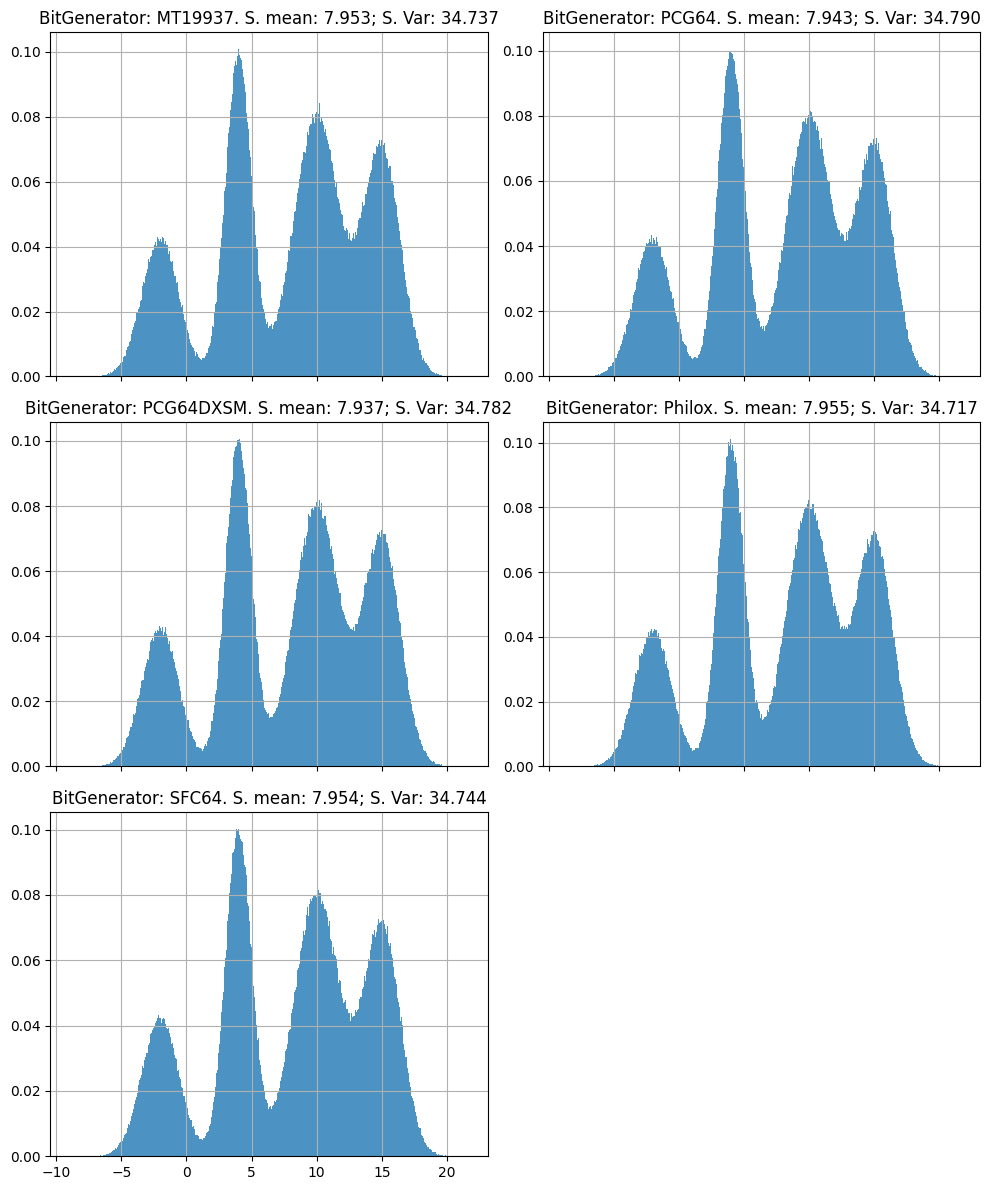

In [60]:
#Plotting from different rng algorithms

n = len(samples_from_rng)
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), sharex=True)
axes = axes.flatten() 

for ax, (name, samples) in zip(axes, samples_from_rng.items()):
    mean = np.mean(samples)
    var = np.var(samples)
    ax.hist(samples, bins=500, density=True, alpha=0.8)
    ax.set_title(f"BitGenerator: {name}. S. mean: {mean:.3f}; S. Var: {var:.3f}",)
    ax.grid(True)

for i in range(len(samples_from_rng), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Exercise 2

$$
\begin{array}{l}
\textbf{Let } X \sim \operatorname{Exp}(\lambda) \textbf{ and } Y \sim U(a,b). \text{ We wish to calculate the probability:} \\[1ex]
\qquad P(X > Y). \\[2ex]

\text{Since } X \text{ and } Y \text{ are independent, we can write:} \\[1ex]
\qquad P(X > Y) = \int_a^b P(X > y \mid Y = y) f_Y(y) \, dy, \\[1ex]
\text{where } f_Y(y) \text{ is the density of the uniform distribution on } [a,b]: \\[1ex]
\qquad f_Y(y) = \frac{1}{b-a}, \quad \text{for } y \in [a,b]. \\[2ex]

\text{For an exponential random variable } X \text{ with parameter } \lambda, \text{ the survival function is:} \\[1ex]
\qquad P(X > y) = \int_y^\infty \lambda e^{-\lambda x} \, dx = e^{-\lambda y}, \quad \text{for } y \ge 0. \\[2ex]

\text{Substituting the expression for } P(X > y) \text{ into the integral:} \\[1ex]
\qquad P(X > Y) = \frac{1}{b-a} \int_a^b e^{-\lambda y} \, dy. \\[1ex]
\text{We compute the integral:} \\[1ex]
\qquad \int_a^b e^{-\lambda y} \, dy = \left[ -\frac{1}{\lambda} e^{-\lambda y} \right]_a^b = \frac{1}{\lambda}\left(e^{-\lambda a} - e^{-\lambda b}\right). \\[2ex]

\text{Substitute back to obtain:} \\[1ex]
\qquad P(X > Y) = \frac{1}{b-a} \cdot \frac{e^{-\lambda a} - e^{-\lambda b}}{\lambda} = \frac{e^{-\lambda a} - e^{-\lambda b}}{\lambda (b-a)}. \\[1ex]
\text{Thus, the final expression is:} \\[1ex]
\qquad \boxed{P(X > Y) = \frac{e^{-\lambda a} - e^{-\lambda b}}{\lambda (b-a)}.} \\[3ex]
\qquad P(X > Y) = \frac{e^{-1 \cdot 0} - e^{1 \cdot 5}}{1 \cdot (5-0)} = \frac{1 - e^5}{5} \approx 0.1987
\end{array}
$$


In [61]:
# Initialize different RNGs, one for each algorithm

rng_mt19937=     np.random.Generator(bg_mt19937)
rng_pcg64=       np.random.Generator(bg_pcg64)
rng_pcg64dxsm=   np.random.Generator(bg_pcg64dxsm)
rng_philox=      np.random.Generator(bg_philox)
rng_sfc64=       np.random.Generator(bg_sfc64)

all_rngs = [rng_mt19937, rng_pcg64, rng_pcg64dxsm, rng_philox, rng_sfc64]

In [62]:
# Exponential's parameter
exponential_mean = 1.0

# Uniform's parameters
uniform_low = 0.0
uniform_high = 5.0

In [63]:
DATASET_SIZE = int(1e6)

samples_from_rng = {}

for rng in all_rngs:
    samples = []
    
    for i in range(DATASET_SIZE):
        sample = {}

        sample['exponential'] = rng.exponential(scale=exponential_mean)
        sample['uniform'] = rng.uniform(low=uniform_low, high=uniform_high)

        samples.append(sample)
        

    samples_from_rng[rng.bit_generator.__class__.__name__] = samples

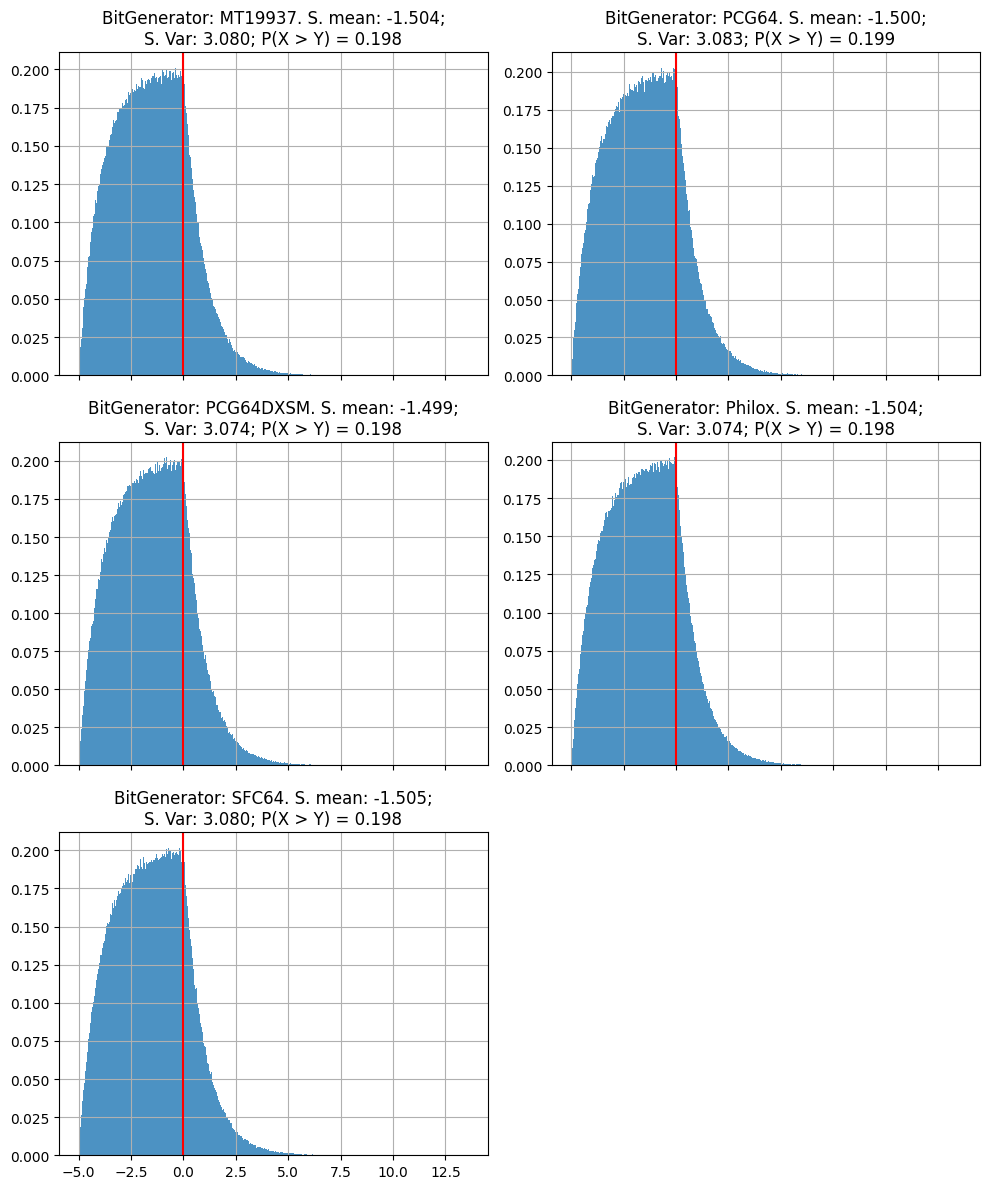

In [64]:
#Plotting from different rng algorithms

n = len(samples_from_rng)
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), sharex=True)
axes = axes.flatten() 

for ax, (name, samples) in zip(axes, samples_from_rng.items()):
    # Calculate deltas just for plotting
    deltas = [sample['exponential'] - sample['uniform'] for sample in samples]
    mean = np.mean(deltas)
    var = np.var(deltas)

    # Probability of X > Y
    positive_rate = np.sum(np.array(deltas) > 0) / len(deltas)
    ax.hist(deltas, bins=500, density=True, alpha=0.8)
    ax.set_title(f"BitGenerator: {name}. S. mean: {mean:.3f};\nS. Var: {var:.3f}; P(X > Y) = {positive_rate:.3f}",)
    ax.grid(True)

    # Add a vertical red line at x = 0
    ax.axvline(x=0, color='red', linestyle='-', linewidth=1.5)

for i in range(len(samples_from_rng), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()